In [1]:
pip install ucimlrepo


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
individual_household_electric_power_consumption = fetch_ucirepo(id=235) 

In [3]:
print(individual_household_electric_power_consumption)

{'data': {'ids': None, 'features':                Date      Time Global_active_power Global_reactive_power  \
0        16/12/2006  17:24:00               4.216                 0.418   
1        16/12/2006  17:25:00               5.360                 0.436   
2        16/12/2006  17:26:00               5.374                 0.498   
3        16/12/2006  17:27:00               5.388                 0.502   
4        16/12/2006  17:28:00               3.666                 0.528   
...             ...       ...                 ...                   ...   
2075254  26/11/2010  20:58:00               0.946                   0.0   
2075255  26/11/2010  20:59:00               0.944                   0.0   
2075256  26/11/2010  21:00:00               0.938                   0.0   
2075257  26/11/2010  21:01:00               0.934                   0.0   
2075258  26/11/2010  21:02:00               0.932                   0.0   

         Voltage Global_intensity Sub_metering_1 Sub_metering_2 

In [1]:
import pandas as pd
import numpy as np


df = individual_household_electric_power_consumption.data.features.copy()  # full DataFrame

NameError: name 'individual_household_electric_power_consumption' is not defined

In [5]:
# Create a new column called 'Datetime' by combining Date and Time
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H:%M:%S')

In [6]:
df.drop(columns=['Date', 'Time'], inplace=True)  # Keep Datetime if you still need it

In [7]:
df.replace('?', np.nan, inplace=True)

In [8]:
df.dropna(inplace=True)

In [9]:
# List of numeric columns to convert
numeric_cols = ['Global_active_power', 'Global_reactive_power', 'Voltage', 
                'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

# Convert to float
df[numeric_cols] = df[numeric_cols].astype(float)

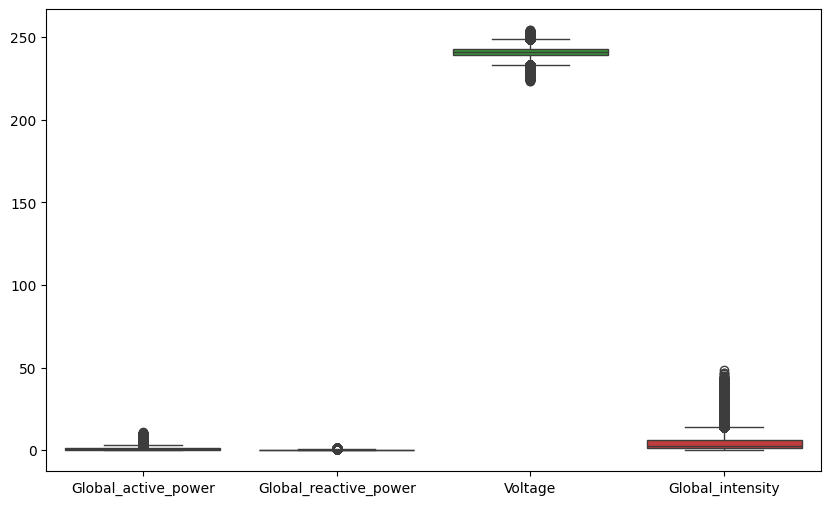

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']])
plt.show()

In [11]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Filter out the outliers
df_no_outliers = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

print("Original shape:", df.shape)
print("Shape after outlier removal:", df_no_outliers.shape)

Original shape: (2049280, 8)
Shape after outlier removal: (1739167, 8)


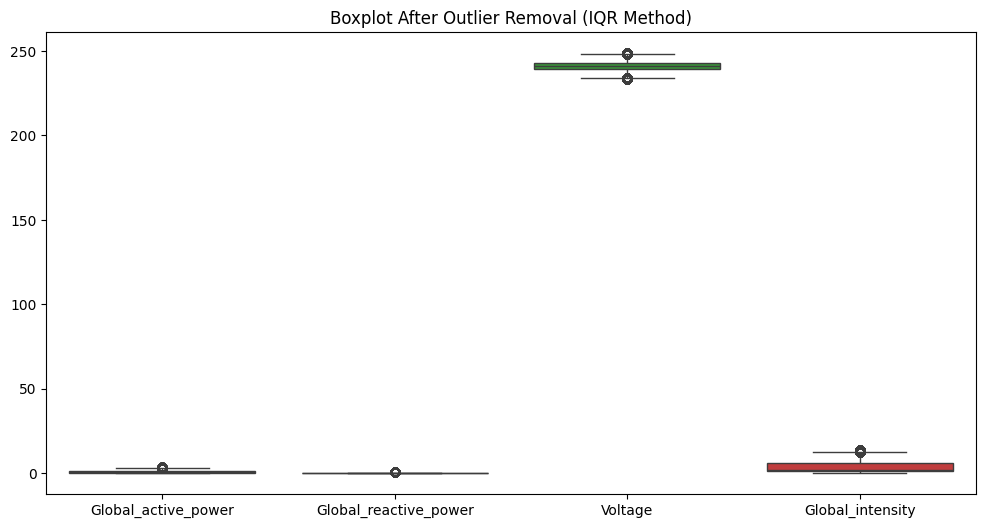

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Use your cleaned DataFrame (e.g., df_no_outliers)
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_no_outliers[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']])
plt.title("Boxplot After Outlier Removal (IQR Method)")
plt.show()


In [25]:
df['Sub_metering_1'].isna().sum()


np.int64(0)

In [26]:
df_no_outliers['Sub_metering_1'].isna().sum()

np.int64(0)

In [27]:
df['Sub_metering_1'].nunique()

88

In [28]:
df_no_outliers['Sub_metering_1'].nunique()

1

In [13]:
df_no_outliers.drop(columns=['Sub_metering_1'], inplace=True)


C:\Users\Dell\AppData\Local\Temp\ipykernel_5900\3095722849.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers.drop(columns=['Sub_metering_1'], inplace=True)


In [14]:
df_no_outliers.drop(columns=['Datetime'], inplace=True)



C:\Users\Dell\AppData\Local\Temp\ipykernel_5900\1923638752.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers.drop(columns=['Datetime'], inplace=True)


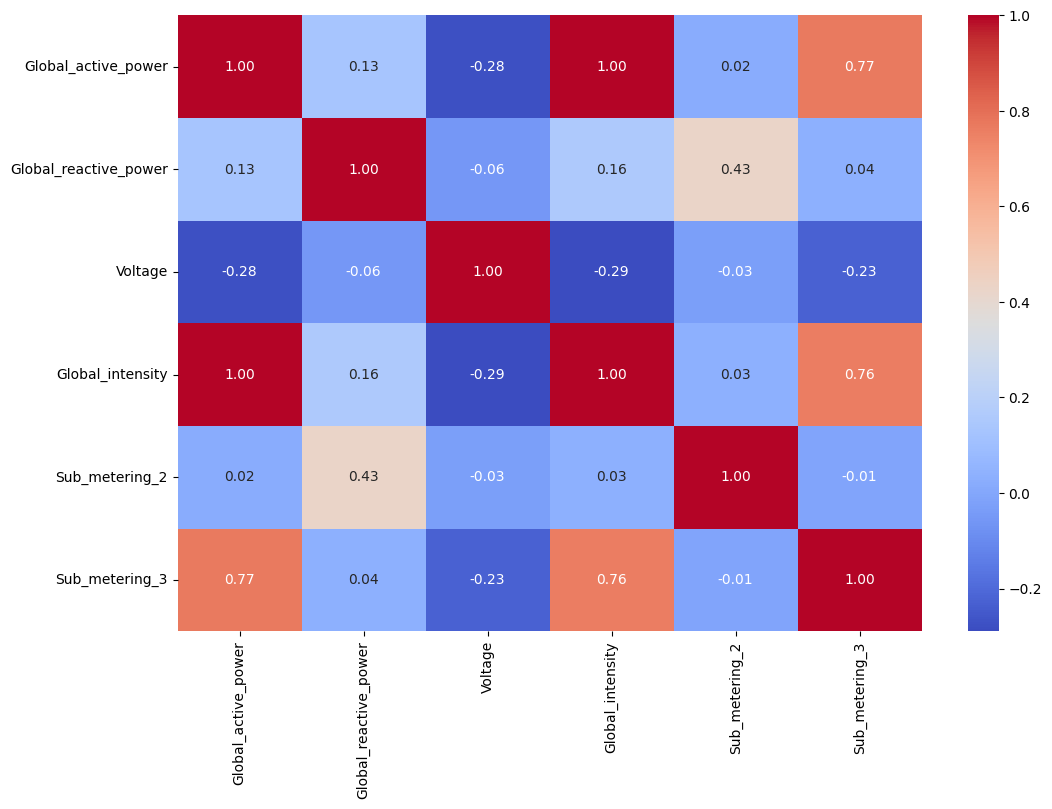

In [36]:
correlation_matrix = df_no_outliers.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [31]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
from sklearn.model_selection import train_test_split

X = df_no_outliers.drop(columns=['Global_active_power'])
y = df_no_outliers['Global_active_power']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
print(y_train)

349934     0.212
1999443    0.466
173429     0.226
954495     1.758
1955929    0.816
           ...  
325111     0.100
1688648    1.510
162621     0.338
814977     0.162
150292     0.316
Name: Global_active_power, Length: 1391333, dtype: float64


In [38]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train) #here scale the  train data and find the min max value for x_train
X_test_scaled = scaler.transform(X_test) #here scale the test data  based on x_train min max value to scale the x_test

from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled,y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

print('M value:',lr_model.coef_) #m value
print('C value:',lr_model.intercept_) #c value

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print("Linear Regression:")
print("R²:", r2_score(y_test, y_pred_lr))
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))

M value: [-7.55923507e-02  5.39260529e-02  3.26393876e+00  5.45419438e-05
  5.43605731e-02]
C value: 0.01739349113002764
Linear Regression:
R²: 0.9978018625277782
MAE: 0.021877673401937234
MSE: 0.001106153572946184
RMSE: 0.03325888712729552


In [39]:
from sklearn.ensemble import RandomForestClassifier

# Initialize model
rf_model = RandomForestClassifier(n_estimators=100)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("\nRandom Forest Model Evaluation:")
print("R²:", r2_score(y_test, y_pred_rf))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred_rf))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred_rf))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred_rf)))

ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rf))

In [40]:
from sklearn.ensemble import RandomForestRegressor

# Initialize model
rf_model = RandomForestRegressor(n_estimators=100)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("\nRandom Forest Model Evaluation:")
print("R²:", r2_score(y_test, y_pred_rf))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred_rf))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred_rf))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred_rf)))


Random Forest Model Evaluation:
R²: 0.9981489418105076
Mean Absolute Error (MAE): 0.017361217363807677
Mean Squared Error (MSE): 0.0009314952571955234
Root Mean Squared Error (RMSE): 0.030520407225257062


In [41]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize model
gb_model = GradientBoostingRegressor(n_estimators=50)

# Train the model
gb_model.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
print("\nGradient Boosting Model Evaluation:")
print("R²:", r2_score(y_test, y_pred_gb))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred_gb))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred_gb))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred_gb)))


Gradient Boosting Model Evaluation:
R²: 0.9979115360477122
Mean Absolute Error (MAE): 0.02110122965662545
Mean Squared Error (MSE): 0.0010509633232618054
Root Mean Squared Error (RMSE): 0.032418564484902865


In [42]:
from sklearn.neural_network import MLPRegressor

# Initialize model
nn_model = MLPRegressor(hidden_layer_sizes=(50), max_iter=1000, random_state=42)

# Train the model
nn_model.fit(X_train, y_train)

# Make predictions
y_pred_nn = nn_model.predict(X_test)

# Evaluate the model
print("\nNeural Network Model Evaluation:")
print("R²:", r2_score(y_test, y_pred_nn))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred_nn))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred_nn))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred_nn)))


Neural Network Model Evaluation:
R²: 0.995293685596151
Mean Absolute Error (MAE): 0.04117741274953448
Mean Squared Error (MSE): 0.0023683261665903787
Root Mean Squared Error (RMSE): 0.04866545146806283
